In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mp
import requests

In [8]:
symbol = 'ethusdt'
period = '1day'
size = '999'

params = {'symbol': symbol, 'period': period,'size': size}


url = 'https://api.huobipro.com/market/history/kline'
res = requests.get(url, params).json()['data'][::-1]

chart = pd.DataFrame(res)

chart = chart[:-1]

chart.tail()

,amount,close,count,high,id,low,open,vol
501,297400.212704,131.73,97022,136.49,1552233600,131.31,135.25,3.979844e+07
502,388052.255992,133.00,117964,135.20,1552320000,128.11,131.72,5.123988e+07
503,280485.293051,132.07,95268,133.98,1552406400,130.72,133.00,3.712706e+07
504,261181.233480,132.24,86647,134.97,1552492800,129.74,132.08,3.445737e+07
505,277714.423797,136.83,87898,137.36,1552579200,131.87,132.24,3.723305e+07


In [9]:
chart['ema12'] = chart['close'].ewm(span=12,min_periods=0,adjust=True,ignore_na=False).mean()
chart['ema26'] = chart['close'].ewm(span=26,min_periods=0,adjust=True,ignore_na=False).mean()
chart['macd'] = chart['ema12'] - chart['ema26']
chart['signal'] = chart['macd'].ewm(span=9,min_periods=0,adjust=True,ignore_na=False).mean()

chart['ema20'] = chart['close'].ewm(span=20,min_periods=0,adjust=True,ignore_na=False).mean()
chart['sma30'] = chart['close'].rolling(window=30,center=False).mean()
chart['trend'] = chart['ema20'] - chart['sma30']
chart['diff'] = chart['macd'] - chart['signal']

chart = chart[29:]
chart

,amount,close,count,high,id,low,open,vol,ema12,ema26,macd,signal,ema20,sma30,trend,diff
29,4.804363e+04,453.04,25865,460.00,1511452800,398.02,413.66,2.035670e+07,368.472270,345.114645,23.357624,12.840621,351.723126,323.044667,28.678459,10.517004
30,3.275184e+04,469.06,22712,485.00,1511539200,445.64,453.47,1.519201e+07,384.035008,355.226209,28.808799,16.037422,363.423811,328.877000,34.546811,12.771377
31,2.608572e+04,455.86,14667,469.75,1511625600,446.00,468.73,1.192980e+07,395.137951,363.374826,31.763125,19.185057,372.600314,334.105667,38.494648,12.578068
32,3.235755e+04,474.71,22554,487.33,1511712000,448.00,455.86,1.518634e+07,407.429399,372.328198,35.101201,22.370304,382.696398,340.192333,42.504064,12.730896
33,3.152479e+04,468.97,26622,480.01,1511798400,453.70,474.71,1.487164e+07,416.929618,380.050962,36.878657,25.273447,391.195780,345.558000,45.637780,11.605210
34,4.317207e+04,490.41,37036,510.00,1511884800,461.00,468.66,2.071723e+07,428.267045,388.818708,39.448337,28.109575,400.938087,351.720667,49.217421,11.338762
35,4.149591e+04,397.07,39162,496.19,1511971200,387.16,490.07,1.808295e+07,423.455739,389.470748,33.984990,29.285040,400.559381,354.768333,45.791048,4.699950
36,2.807260e+04,446.82,27688,458.00,1512057600,397.06,397.92,1.213055e+07,427.057690,393.980333,33.077358,30.043700,405.076489,359.695333,45.381156,3.033657
37,2.290059e+04,451.10,22444,475.00,1512144000,440.11,446.80,1.053713e+07,430.762992,398.451477,32.311515,30.497358,409.559655,365.141667,44.417988,1.814158
38,2.040838e+04,478.06,18886,480.00,1512230400,450.54,450.80,9.519890e+06,438.050247,404.656897,33.393349,31.076652,416.217834,371.000667,45.217167,2.316697


In [13]:
size = chart.id.count()
order = [] # [price, amount]
asset = 1
history = [1]
growth = []

method = 0

fee = 1

for i in range(size):
    entry = chart.iloc[i]
    price = entry['open']
    
    if method == 1:
        amount = (asset / price) * fee
        order = [price, amount]
        asset = 0
        method = 0

    if method == -1:
        asset += (order[1] * price) * fee
#         gain = (asset / history[-1])
        history.append(asset)
#         growth.append(gain)
        order = []
        method = 0

    else:
        if entry['trend'] < 0:
            if order:
                method = -1
        
        if entry['trend'] > 0:
            if not order:
                if entry['diff'] > 0:
                    method = 1
            else:
                if entry['diff'] < 0:
                    method = -1

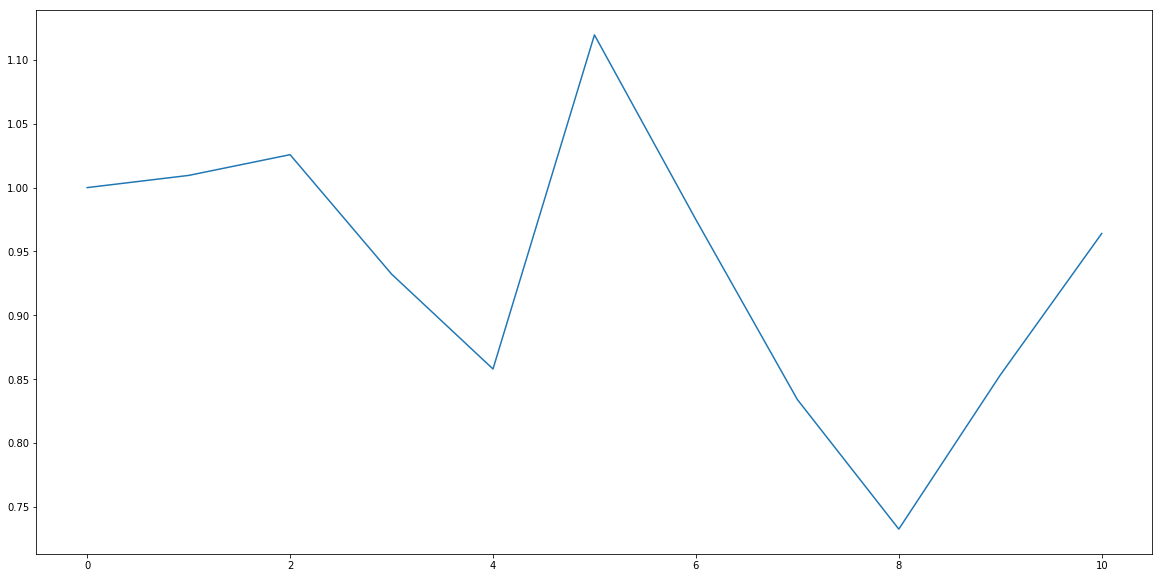

In [14]:
plt.rcParams['figure.figsize'] = (20, 10)
plt.plot(history)
plt.show()